# Q1: Solve the following linear equation by Cholesky decomposition (check for symmetric matrix) and Gauss-Seidel to a precision of $10^{-6}$.

$$
\begin{pmatrix}
4 & -1 & 0 & -1 & 0 & 0\\
-1 & 4 & -1 & 0 & -1 & 0\\
0 & -1 & 4 & 0 & 0 & -1\\
-1 & 0 & 0 & 4 & -1 & 0\\
0 & -1 & 0 & -1 & 4 & -1\\
0 & 0 & -1 & 0 & -1 & 4
\end{pmatrix}


\begin{pmatrix}
x_1\\
x_2\\
x_3\\
x_4\\
x_5\\
x_6
\end{pmatrix}

=

\begin{pmatrix}
2\\
1\\
2\\
2\\
1\\
2
\end{pmatrix}
$$

In [1]:
from library.matrix import Matrix
from library.linear_equations import gauss_seidel, Cholesky_Decomposition
from library.linear_equations import forward_propagation, backward_propagation
from library.basic_functions import truncate_to_decimal_places as trunc

import numpy as np

In [2]:
precision = 3

A = Matrix(
    [
        [4, -1, 0, -1, 0, 0],
        [-1, 4, -1, 0, -1, 0],
        [0, -1, 4, 0, 0, -1],
        [-1, 0, 0, 4, -1, 0],
        [0, -1, 0, -1, 4, -1],
        [0, 0, -1, 0, -1, 4],
    ], "A", precision
)

B = Matrix(
    [
        [2],
        [1],
        [2],
        [2],
        [1],
        [2]
    ], "B", precision
)

In [3]:
L = Cholesky_Decomposition(A)
y = forward_propagation(L, B)
x = backward_propagation(L.T(), y)
print(x)

x = |0.999|
    |0.999|
    |1.000|
    |1.000|
    |1.000|
    |0.999|



## Gauss-Seidel

In [4]:
precision = 3

A = Matrix(
    [
        [4, -1, 0, -1, 0, 0],
        [-1, 4, -1, 0, -1, 0],
        [0, -1, 4, 0, 0, -1],
        [-1, 0, 0, 4, -1, 0],
        [0, -1, 0, -1, 4, -1],
        [0, 0, -1, 0, -1, 4],
    ], "A", precision
)

B = Matrix(
    [
        [2],
        [1],
        [2],
        [2],
        [1],
        [2]
    ], "B", precision
)

In [5]:
x, i = gauss_seidel(A, B, tol = 1e-6, seed=0.1, max_iter = 100)
print(x)
print("number of iterations for the required precision:", i)

x = |0.999999|
    |0.999999|
    |0.999999|
    |0.999999|
    |0.999999|
    |0.999999|

number of iterations for the required precision: 6


In [6]:
# just checking
print(A@x==B)

True


# Q2: Solve the following linear equation by Gauss-Jordon and LU factorization.

$$
\begin{pmatrix}
0 & 4 & 2 & 0 & 1\\
4 & 0 & 4 & 10 & 1\\
2 & 5 & 1 & 3 & 13\\
11 & 3 & 0 & 1 & 2\\
3 & 2 & 7 & 1 & 0
\end{pmatrix}


\begin{pmatrix}
x_1\\
x_2\\
x_3\\
x_4\\
x_5
\end{pmatrix}

=

\begin{pmatrix}
20\\
15\\
92\\
51\\
15
\end{pmatrix}
$$

for doing this we had to change the positions of the different rows to make the matrix diagonally dominant.

In [7]:
from library.linear_equations import gauss_jordan
from library.linear_equations import LU_Decomposition

In [8]:
# defining the number of places to show after the decimal point
precision = 3

# Defining the Given Matrices
A = Matrix(
    [
        [ 2, 5, 1,  3, 13],  # row 2
        [ 0, 4, 2,  0,  1],  # row 0
        [ 4, 0, 4, 10,  1],  # row 1
        [ 3, 2, 7,  1,  0],  # row 4
        [11, 3, 0,  1,  2],  # row 3
    ], "A", precision
)

B = Matrix(
    [
        [92],  # row 2
        [20],  # row 0
        [15],  # row 1
        [15],  # row 4
        [51],  # row 3
    ], "B", precision
)

In [9]:
x = gauss_jordan(A, B)
sol = x[::, -1]

print("Gauss Jordan Solution")
x0, x1, x2, x3, x4 = sol.T().mat[0]  # unpacking in correct order
print(f"x0 = {trunc(x0, 3):>6}")
print(f"x1 = {trunc(x1, 3):>6}")
print(f"x2 = {trunc(x2, 3):>6}")
print(f"x3 = {trunc(x3, 3):>6}")
print(f"x4 = {trunc(x4, 3):>6}")

Gauss Jordan Solution
x0 =  2.674
x1 =  3.711
x2 = -0.054
x3 = -0.075
x4 =  5.259


In [10]:
# defining the number of places to show after the decimal point
precision = 3

# Defining the Given Matrices again because gauss jordan did inplace operations and changed the matrices
A = Matrix(
    [
        [ 2, 5, 1,  3, 13],  # row 2
        [ 0, 4, 2,  0,  1],  # row 0
        [ 4, 0, 4, 10,  1],  # row 1
        [ 3, 2, 7,  1,  0],  # row 4
        [11, 3, 0,  1,  2],  # row 3
    ], "A", precision
)

B = Matrix(
    [
        [92],  # row 2
        [20],  # row 0
        [15],  # row 1
        [15],  # row 4
        [51],  # row 3
    ], "B", precision
)

In [11]:
L, U = LU_Decomposition(A)
y = forward_propagation(L, B)
x = backward_propagation(U, y)

print("LU factorization Solution")
x0, x1, x2, x3, x4 = x.T().mat[0]  # unpacking in correct order
print(f"x0 = {trunc(x0, 3):>6}")
print(f"x1 = {trunc(x1, 3):>6}")
print(f"x2 = {trunc(x2, 3):>6}")
print(f"x3 = {trunc(x3, 3):>6}")
print(f"x4 = {trunc(x4, 3):>6}")

LU factorization Solution
x0 =  2.674
x1 =  3.711
x2 = -0.054
x3 = -0.075
x4 =  5.259


# Q3

In [12]:
from library.linear_equations import conjugate_gradient

In [13]:
A = np.array(
    [
        [ 2,-3, 0, 0, 0, 0],
        [-1, 4,-1, 0,-1, 0],
        [ 0,-1, 4, 0, 0,-1],
        [ 0, 0, 0, 2,-3, 0],
        [ 0,-1, 0,-1, 4,-1],
        [ 0, 0,-1, 0,-1, 4]
    ]
)

In [14]:
# invert the matrix A... to do this, we are takng the B matrix to be the identity matrix
B = np.eye(*A.shape)
A_inv = np.zeros(A.shape)
for i in range(B.shape[0]):
    x, ite, residue = conjugate_gradient(A, B[:, i:i+1], x0=np.random.rand(len(B), 1), tol=1e-4, max_iter=100)
    A_inv[:, i] = x[:, 0]
print(Matrix(A_inv, "A_inv", 4))

A_inv = |0.9423   0.9187   0.3016   0.0361   0.4659   -1.3931|
        |0.2925   0.5974   0.2139   0.0226   0.2836   -3.2168|
        |0.0878   0.1754   0.2936   -0.0337  0.1080   -1.0879|
        |0.2161   0.4279   0.1427   0.7647   0.8484   6.5496  |
        |0.1408   0.2812   0.1148   0.1717   0.5736   0.8740  |
        |0.0573   0.1084   0.0753   -0.0077  0.1685   2.9975  |



In [15]:
A = np.array(
    [
        [ 2,-1, 0, 0, 0, 0],
        [-1, 4,-1, 0,-1, 0],
        [ 0,-1, 4, 0, 0,-1],
        [ 0, 0, 0, 2,-1, 0],
        [ 0,-1, 0,-1, 4,-1],
        [ 0, 0,-1, 0,-1, 4]
    ]
)

B = np.array(
    [
        [-5/3],
        [+2/3],
        [+3/1],
        [-4/3],
        [-1/3],
        [+5/3]
    ]
)

In [16]:
x = np.linalg.solve(A, B)

In [17]:
x

array([[-0.72450805],
       [ 0.21765057],
       [ 0.96660704],
       [-0.68574836],
       [-0.03816339],
       [ 0.64877758]])

In [18]:
x, itr, residue = conjugate_gradient(A, B, x0=np.random.rand(len(B), 1), tol=1e-4, max_iter=10)
print(f"Conjugate Gradient Solution (took {itr} iterations to converge)")
x0, x1, x2, x3, x4, x5 = x[:, 0]  # unpacking in correct order
print(f"x0 = {trunc(x0.item(), 4):>7}")
print(f"x1 = {trunc(x1.item(), 4):>7}")
print(f"x2 = {trunc(x2.item(), 4):>7}")
print(f"x3 = {trunc(x3.item(), 4):>7}")
print(f"x4 = {trunc(x4.item(), 4):>7}")
print(f"x5 = {trunc(x5.item(), 4):>7}")

Conjugate Gradient Solution (took 6 iterations to converge)
x0 = -0.7246
x1 =  0.2176
x2 =  0.9666
x3 = -0.6858
x4 = -0.0382
x5 =  0.6487


# Q4

$A = \frac{1}{2} \left( \delta_{x+\mu, y} + \delta_{x-\mu, y} - 2\delta_{x, y} \right) + m^2\delta_{x, y}$

to solve this equation without storing the whole 50x50 matrix, we defined it as a function (not a matrix) that takes i, j as input and returns the value of the matrix at that location.

Although we didn't store the matrix which takes $n^2$ space, we still had to store a couple of vectors which takes $n$ space each. So, the space complexity is $O(n)$. I don't think we can do better than this in terms of space complexity.

In [19]:
import matplotlib.pyplot as plt
from tqdm import tqdm, trange  # for a cool looking loading bar

In [20]:
def dot_product(A, b):
    # here A is a function and b is a vector
    n = len(b)
    result = []
    for i in range(n):
        dot_product_sum = 0
        for j in range(n):
            dot_product_sum += A(i, j) * b[j]
        result.append(dot_product_sum)
    return result

def conjugate_gradient_nostore(A, b, x0, tol=1e-4, max_iter=None):
    n = len(b)
    x = x0.copy()
    r = b - dot_product(A, x)
    p = r.copy()
    iter_count = 0

    residues = []
    while True:
        iter_count += 1
        Ap = dot_product(A, p)
        alpha = np.dot(r.T, r) / np.dot(p.T, Ap)
        x += alpha * p
        r_next = r - alpha * Ap
        residues.append(np.linalg.norm(r_next))
        if np.linalg.norm(r_next) < tol:
            break
        beta = np.dot(r_next.T, r_next) / np.dot(r.T, r)
        p = r_next + beta * p
        r = r_next

        if max_iter is not None and iter_count >= max_iter:
            break

    return x, iter_count, residues

Although the function `conjugate_gradient_nostore` returns the solution to the equation (actually matrix inverse), we are not storing it, because it defeats the whole purpose of not storing the matrix. The space needed to store the $A^{-1}$ matrix is also $n^2$. So, we are not storing it. We are just using the residue because that was the target.

In [21]:
n = 50
m = 0.2
def delta(i, j):
    return 1 if i == j else 0

def A_(i, j, mu=1, m=m):
    return 0.5 * (
        delta(i+mu, j)
      + delta(i-mu, j)
      - 2*delta(i, j)
    ) + m**2 * delta(i, j) if not ((i == 0 and j == n-1) or (i == n-1 and j == 0)) else 0.5

all_residues = []

for i in trange(n):
    Bi = np.zeros((n, 1))
    Bi[i, 0] = 1
    x, ite, residues = conjugate_gradient_nostore(A_, Bi, x0=np.random.rand(n, 1), tol=1e-4, max_iter=100)
    # here we are not storing the x values to make the A_inv matrix, as explained above
    all_residues.append(residues)


all_residues = np.array(all_residues)

100%|██████████| 50/50 [00:06<00:00,  7.77it/s]


Text(0, 0.5, 'residue')

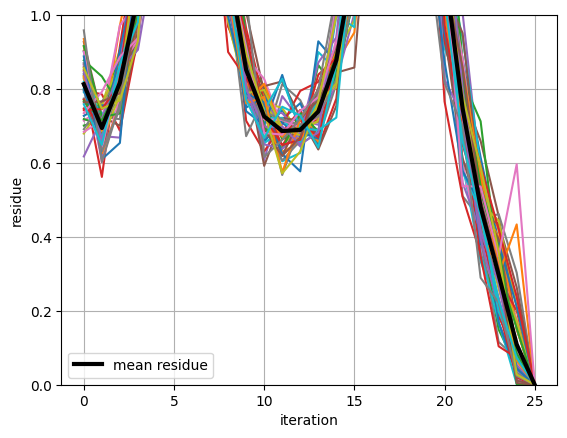

In [22]:
plt.plot(all_residues.T)
# plt.xscale("log")
plt.ylim(0, 1)
plt.plot(all_residues.mean(axis=0), "k-", label="mean residue", linewidth=3)
plt.legend()
plt.grid()
plt.xlabel("iteration")
plt.ylabel("residue")